In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import math as mt
import seaborn as sns #visualisation
import matplotlib.pyplot as plt # visualisation
plt.style.use("seaborn-whitegrid")
import warnings            
warnings.filterwarnings("ignore") # We can suppress the warnings
#calculation
import statistics as stats 
from statsmodels.stats import weightstats
import scipy.stats as pystats 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as scipy


In [2]:
# Importing the dataset Production

df1 =pd.read_csv("1.Barley.csv")
df2 =pd.read_csv("2.Meat_Cattle.csv")
df3 =pd.read_csv("3.Meat_Pig.csv")
df4 =pd.read_csv("4.Raw_Milk.csv")


In [3]:
# change names on datasets

df1 = df1.rename(columns = {"Value":"Barley"})
df2 = df2.rename(columns = {"Value":"Meat Cattle"})
df3 = df3.rename(columns = {"Value":"Meat Pig"})
df4 = df4.rename(columns = {"Value":"Raw Milk"})


In [4]:
#Created a join tables
df_m1 = pd.merge(df1,df2, how='inner', on=["Area","Year"],suffixes=("_df1", "_df2"))
df_m2 = pd.merge(df3,df4, how='inner', on=["Area","Year"],suffixes=("_df3", "_df4"))
df_prod = pd.merge(df_m1,df_m2, how='inner', on=["Area","Year"])

In [5]:
# Clean the dataset, deleting useless columns for ou analyse

df_prod.drop(["Domain_Code_df1","Domain_Code_df2","Domain_Code_df3","Domain_Code_df4"], axis=1, inplace=True)
df_prod.drop(["Domain_df1","Domain_df2","Domain_df3","Domain_df4"], axis=1, inplace=True)
df_prod.drop(["Area_Code_(M49)_df1","Area_Code_(M49)_df2","Area_Code_(M49)_df3","Area_Code_(M49)_df4"], axis=1, inplace=True)
df_prod.drop(["Element_Code_df1","Element_Code_df2","Element_Code_df3","Element_Code_df4"], axis=1, inplace=True)
df_prod.drop(["Element_df1","Element_df2","Element_df3","Element_df4"], axis=1, inplace=True)
df_prod.drop(["Item_Code_(CPC)_df1","Item_Code_(CPC)_df2","Item_Code_(CPC)_df3","Item_Code_(CPC)_df4"], axis=1, inplace=True)
df_prod.drop(["Item_df1","Item_df2","Item_df3","Item_df4"], axis=1, inplace=True)
df_prod.drop(["Year_Code_df1","Year_Code_df2","Year_Code_df3","Year_Code_df4"], axis=1, inplace=True)
df_prod.drop(["Unit_df1","Unit_df2","Unit_df3","Unit_df4"], axis=1, inplace=True)
df_prod.drop(["Flag_df1","Flag_df2","Flag_df3","Flag_df4"], axis=1, inplace=True)
df_prod.drop(["Flag_Description_df1","Flag_Description_df2","Flag_Description_df3","Flag_Description_df4"], axis=1, inplace=True)

# Prints out the first few rows
print(df_prod.head())

      Area  Year  Barley  Meat Cattle  Meat Pig  Raw Milk
0  Austria  2015  109982       975437    844993   1322196
1  Austria  2016   97002       944660    854356   1256018
2  Austria  2017  102480       991803    953570   1564446
3  Austria  2018  111802      1069738    902580   1823111
4  Austria  2019  114030       958769    994757   1566252


In [6]:
#Save new data frame as extension.CSV
#df_prod.to_csv("Consolidated Production.csv")

In [7]:
# Importing the dataset Price
# csv created on Jupyter notebook: Population_Europena.ipynb
df_pop =pd.read_csv("Consolidated Population.csv")

In [8]:
#Removed the column "Unnamed"
df_pop = df_pop.loc[:, ~df_pop.columns.str.contains('^Unnamed')]

In [9]:
#full print
df_pop

,Area,Year,Female_K,Male_K,Rural_K,Urban_K
0,Austria,2015,4406.012,4236.408,3669.727,5008.930
1,Austria,2016,4444.016,4292.470,3667.377,5044.760
2,Austria,2017,4472.011,4325.485,3660.707,5074.746
3,Austria,2018,4492.710,4347.802,3649.748,5102.072
4,Austria,2019,4511.992,4367.948,3636.627,5129.574
...,...,...,...,...,...,...
157,Sweden,2016,4964.310,4989.007,1293.399,8544.134
158,Sweden,2017,5010.970,5047.220,1273.943,8636.758
159,Sweden,2018,5057.292,5105.006,1254.718,8727.991
160,Sweden,2019,5104.556,5163.366,1235.720,8817.415


In [10]:
df_prod

,Area,Year,Barley,Meat Cattle,Meat Pig,Raw Milk
0,Austria,2015,109982,975437,844993,1322196
1,Austria,2016,97002,944660,854356,1256018
2,Austria,2017,102480,991803,953570,1564446
3,Austria,2018,111802,1069738,902580,1823111
4,Austria,2019,114030,958769,994757,1566252
...,...,...,...,...,...,...
117,Sweden,2016,210560,361123,408312,1031884
118,Sweden,2017,259179,365048,411678,1263871
119,Sweden,2018,245885,351124,400078,1273021
120,Sweden,2019,223513,324760,363273,1131124


# T-Test, one population

We are analyzing population applied for "Rural" from ireland compared to other european union countries in average 4202k between 2015 to 2020.


In [11]:
# Define the variable 
#x = Population of Rural (in thousand)
X = df_pop["Rural_K"]; X

0      3669.727
1      3667.377
2      3660.707
3      3649.748
4      3636.627
         ...   
157    1293.399
158    1273.943
159    1254.718
160    1235.720
161    1216.924
Name: Rural_K, Length: 162, dtype: float64

In [12]:
#H0 : u = 4202
#H1 : u =! 4202
#stats.ttest_1samp(X,mu of H0)
pystats.ttest_1samp(X,4202)

Ttest_1sampResult(statistic=4.811456666061871e-05, pvalue=0.9999616696950848)

In [13]:
#H1 : u > 4202
pystats.t.sf(4.811456666061871, 161)

1.7114923604622113e-06

We reject H0 ---> We accept H1, so there is enough evidence to say that the average of population is not 4202k in the european countries betweeen 2015 to 2020.

We are analyzing population applied for "Rural_K" from ireland compared to Creatia in average 1785.48k.

In [14]:
# Created new df to grouping 2 countries
df_pop_Ttest = df_pop[(df_pop.Area == "Ireland") | (df_pop.Area == "Creatia") ]
print(df_pop_Ttest)

       Area  Year  Female_K     Male_K   Rural_K   Urban_K
78  Ireland  2015   2357.720  2308.039  1760.732  2939.375
79  Ireland  2016   2381.941  2333.847  1761.090  2964.988
80  Ireland  2017   2409.471  2362.383  1764.335  2997.322
81  Ireland  2018   2440.194  2394.313  1769.220  3034.528
82  Ireland  2019   2470.880  2425.139  1773.798  3073.341
83  Ireland  2020   2495.802  2450.316  1776.656  3111.336


In [15]:
# Define the variable 
#x = Population of Rural (in thousand)
X = df_pop_Ttest["Rural_K"]; X

78    1760.732
79    1761.090
80    1764.335
81    1769.220
82    1773.798
83    1776.656
Name: Rural_K, dtype: float64

In [16]:
#H0 : u = 1785.48K
#H1 : u =! 1785.48K
#stats.ttest_1samp(X,mu of H0)
pystats.ttest_1samp(X,1785)

Ttest_1sampResult(statistic=-6.36429916703271, pvalue=0.0014158755903700081)

In [17]:
#H1 : u > 1785.48
pystats.t.sf(-6.36429916703271, 83)

0.9999999948811659

We reject H0 ---> We accept H1, so there is enough evidence to say that the average of population is 1785.48k in Ireland and Creatia betweeen 2015 to 2020.

# Anova - Variable

In [18]:
#Add new column with variable
df_pop["Variable_Urban_Rural_K"] = df_pop["Urban_K"]-df_pop["Rural_K"]

#Add new column with Total
df_pop["Total_K"] = df_pop["Rural_K"]+df_pop["Urban_K"]


#Basic information
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    162 non-null    object 
 1   Year                    162 non-null    int64  
 2   Female_K                162 non-null    float64
 3   Male_K                  162 non-null    float64
 4   Rural_K                 162 non-null    float64
 5   Urban_K                 162 non-null    float64
 6   Variable_Urban_Rural_K  162 non-null    float64
 7   Total_K                 162 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.2+ KB


<Figure size 432x288 with 0 Axes>

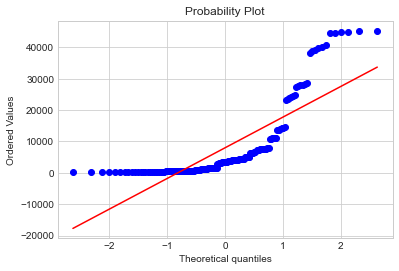

<Figure size 432x288 with 0 Axes>

In [20]:
#Normality plot. Our variable is "Variable_Urban_Rural"

pystats.probplot(df_pop.Variable_Urban_Rural_K, plot=plt)
plt.figure()

In [22]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Ireland"])

ShapiroResult(statistic=0.9757044315338135, pvalue=0.9283227920532227)

In [23]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Croatia"])

ShapiroResult(statistic=0.9807613492012024, pvalue=0.9552789926528931)

In [24]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Denmark"])

ShapiroResult(statistic=0.9838061928749084, pvalue=0.9688383340835571)

In [26]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Luxembourg"])

ShapiroResult(statistic=0.9842236638069153, pvalue=0.9705241918563843)

In [27]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Malta"])

ShapiroResult(statistic=0.9821272492408752, pvalue=0.9616302251815796)

In [28]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Portugal"])

ShapiroResult(statistic=0.9814608693122864, pvalue=0.9585848450660706)

In [29]:
#Shapiro wilk test

pystats.shapiro(df_pop.Variable_Urban_Rural_K[df_pop.Area == "Germany"])

ShapiroResult(statistic=0.9773889183998108, pvalue=0.9378669857978821)

In [34]:
#Creat a new data frame with Ireland and some other European contries.
df_pop_sp = df_pop[(df_pop.Area == "Ireland") | 
                   (df_pop.Area == "Croatia") |
                   (df_pop.Area == "Denmark") |
                   (df_pop.Area == "Luxembourg") |
                   (df_pop.Area == "Malta") |
                   (df_pop.Area == "Portugal") |
                   (df_pop.Area == "Germany") ]
print(df_pop_sp)

           Area  Year  Female_K      Male_K    Rural_K    Urban_K  \
18      Croatia  2015   2196.249   2058.566   1857.290   2378.726   
19      Croatia  2016   2177.865   2045.886   1836.858   2376.407   
20      Croatia  2017   2159.300   2033.167   1815.373   2373.980   
21      Croatia  2018   2140.352   2020.133   1793.077   2371.706   
22      Croatia  2019   2122.252   2007.499   1770.247   2369.901   
23      Croatia  2020   2103.215   1993.655   1747.114   2368.833   
36      Denmark  2015   2858.620   2819.175    709.587   4979.108   
37      Denmark  2016   2872.189   2834.668    705.862   5006.008   
38      Denmark  2017   2886.493   2850.791    701.971   5031.580   
39      Denmark  2018   2900.363   2866.323    697.769   5056.587   
40      Denmark  2019   2914.173   2881.706    693.384   5081.840   
41      Denmark  2020   2928.360   2897.282    688.897   5107.903   
60      Germany  2015  41637.850  40435.376  18629.376  63078.413   
61      Germany  2016  41741.679  

In [32]:
df_pop_sp["Area"].value_counts()

Denmark       6
Germany       6
Ireland       6
Luxembourg    6
Malta         6
Portugal      6
Name: Area, dtype: int64

In [47]:
#organize the data by contries

df_Ireland = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Ireland"]
df_Croatia = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Croatia"]
df_Luxembourg = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Luxembourg"]
df_Malta = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Malta"]
df_Portugal = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Portugal"]
df_Germany = df_pop_sp.Variable_Urban_Rural_K[df_pop_sp.Area =="Germany"]

In [48]:
sd1 = df_Ireland.std()
sd1

58.87004086092227

In [49]:
sd2 = df_Croatia.std()
sd2

37.534444957487516

In [50]:
sd3 = df_Luxembourg.std()
sd3

16.797980612760153

In [51]:
sd4 = df_Malta.std()
sd4

3.293943877279431

In [52]:
sd5 = df_Portugal.std()
sd5

193.7071231332669

In [53]:
sd6 = df_Germany.std()
sd6

328.6764485760543

In [58]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene

In [60]:
levene(df_Ireland, df_Croatia, df_Luxembourg, df_Malta, df_Portugal, df_Germany = "mean")

TypeError: levene() got an unexpected keyword argument 'df_pop'